In this lesson, we will apply what we have learned in the previous lessons about the CFL number and descritiation to solve the second order 1-D diffusion equation

In [33]:
import numpy as ny
from matplotlib import pyplot as py
%matplotlib inline

In [34]:
# set the font family and size
py.rcParams['font.family'] = 'serif'
py.rcParams['font.size'] = 16
py.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

In [35]:
#set parameters
nx = 41 #number of spacial gridpoints
L = 2.0 # length of domain
dx = L / (nx - 1) # spatial grid size
nu = 0.3 #viscosity
sigma = 0.2 #cfl limit
dt = sigma * dx**2 / nu # time-step size
nt = 20 #number of time steps to compute

# get grid point coordinates.
x = ny.linspace(0.0, L, num=nx)

# initial conditions
u0 = ny.ones(nx)
test = ny.where(ny.logical_and(x >= 0.5, x <= 1.0))
u0[test] = 2.0

In [36]:
# integration in time
u = u0.copy()
for n in range(nt):
    u[1:-1] = u[1:-1] + nu * dt / dx ** 2 * (u[2:] - 2 * u[1:-1] + u[:-2])

(0.5, 2.5)

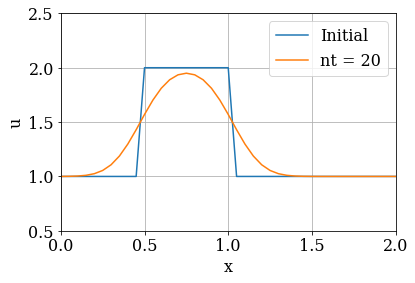

In [37]:
#plot the solution after nt time steps and intial conditions
py.figure(figsize=(6.0, 4.0))
py.xlabel('x')
py.ylabel('u')
py.grid()
py.plot(x, u0, label='Initial', color = 'C0')
py.plot(x, u, label= 'nt = {}'.format(nt), color = 'C1')
py.legend(loc='upper right')
py.xlim(0.0, L)
py.ylim(0.5, 2.5)


Now we are going to use animations to actually watch the diffusion occur in time. we have to import the correct libraries and things.

In [38]:
from matplotlib import animation
from IPython.display import HTML

In [39]:
def diffusion( u0, sigma = 0.5, nt = 20):
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        u[1:-1] = u[1:-1] + sigma * (u[2:] - 2 * u[1:-1] + u[:-2])
        u_hist.append(u.copy())
    return u_hist
    

In [40]:
# compute total history of solution
u_hist = diffusion(u0, sigma=sigma, nt=nt)

Now, we create the figure that we want to animate. IT is simply our initial condition to begin with

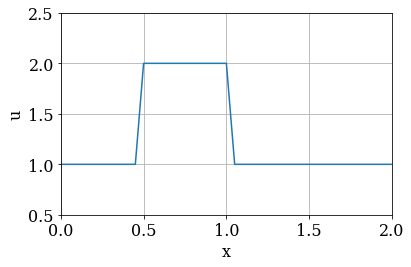

In [41]:
fig = py.figure(figsize = (6.0, 4.0))
py.xlabel('x')
py.ylabel('u')
py.grid()
line = py.plot(x, u0, color='C0')[0]
py.xlim(0.0, L)
py.ylim(0.5, 2.5)
fig.tight_layout()

In [42]:
def update_plot(n, u_hist):
    
    fig.suptitle('Time Step {:0>2}'.format(n))
    line.set_ydata(u_hist[n])

In [43]:
anim = animation.FuncAnimation(fig, update_plot,
                              frames=nt, fargs=(u_hist,),
                              interval=100)

In [44]:
#Distplay video
HTML(anim.to_html5_video())